# Customer Churn

<hr>

> For any company it is very important that they retain their customers. So knowing if what are the reasons that can lead a customer to leave their services.

> Using `Data Science` and `Machine Learning` to build a system that can predict whether a customer will leave their services or not.

<hr>

In [1]:
# To avoid sklearn warnings
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

#### Importing Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, classification_report, confusion_matrix

#### Loading the dataset

In [3]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

#### Target Variable Count Plot

0.0    142
1.0     58
Name: churn, dtype: int64


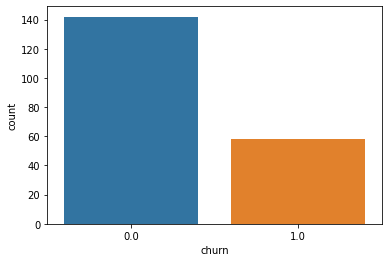

In [6]:
print(df.churn.value_counts())
sns.countplot(x='churn', data=df)

### Pearson Correlation

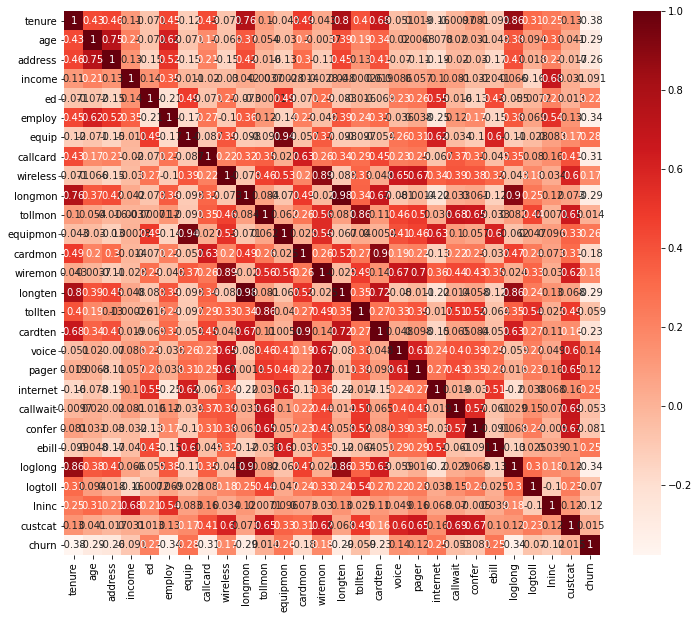

In [7]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Splitting the dataset

In [8]:
from sklearn.model_selection import train_test_split

cols = df.columns.tolist()
cols.remove('churn')
X = df[cols]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Cross Validation

In [9]:
skf = StratifiedKFold(n_splits=10)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [11]:
models = [
    LogisticRegression(), 
    SGDClassifier(), 
    KNeighborsClassifier(), 
    GaussianNB(), 
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
]

In [12]:
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=skf)
    print(f'*** {model} ***')
    print(f'Cross Validation mean score: {scores.mean()}')
    print()

*** LogisticRegression() ***
Cross Validation mean score: 0.7214285714285714

*** SGDClassifier() ***
Cross Validation mean score: 0.5928571428571429

*** KNeighborsClassifier() ***
Cross Validation mean score: 0.7428571428571429

*** GaussianNB() ***
Cross Validation mean score: 0.6142857142857142

*** MultinomialNB() ***
Cross Validation mean score: 0.5142857142857143

*** DecisionTreeClassifier() ***
Cross Validation mean score: 0.6428571428571429

*** RandomForestClassifier() ***
Cross Validation mean score: 0.7357142857142858

*** SVC() ***
Cross Validation mean score: 0.6928571428571428



### Balancing the dataset

In [13]:
len(X_train.columns)

27

In [14]:
from imblearn.over_sampling import SMOTE

#### Cross Validation

In [15]:
_smote = SMOTE(random_state=0)
X_train_sm, y_train_sm = _smote.fit_sample(X_train, y_train)

for model in models:
    scores = cross_val_score(model, X_train_sm, y_train_sm, cv=skf)
    print(f'*** {model} ***')
    print(f'Cross Validation mean score: {scores.mean()}')
    print()

*** LogisticRegression() ***
Cross Validation mean score: 0.7110526315789474

*** SGDClassifier() ***
Cross Validation mean score: 0.6557894736842105

*** KNeighborsClassifier() ***
Cross Validation mean score: 0.6855263157894737

*** GaussianNB() ***
Cross Validation mean score: 0.721578947368421

*** MultinomialNB() ***
Cross Validation mean score: 0.6344736842105263

*** DecisionTreeClassifier() ***
Cross Validation mean score: 0.7457894736842106

*** RandomForestClassifier() ***
Cross Validation mean score: 0.8110526315789472

*** SVC() ***
Cross Validation mean score: 0.6957894736842105



<hr>

## Feature Selection

Using the try and error method to see which features give high cross validation accuracy.

In [16]:
features = ['tenure', 'age', 'ed', 'employ', 'equip', 'callcard']
X_tmp = X_train_sm[features]

In [17]:
for model in models:
    scores = cross_val_score(model, X_tmp, y_train_sm, cv=skf)
    print(f'*** {model} ***')
    print(f'Cross Validation mean score: {scores.mean()}')
    print()

*** LogisticRegression() ***
Cross Validation mean score: 0.758421052631579

*** SGDClassifier() ***
Cross Validation mean score: 0.6599999999999999

*** KNeighborsClassifier() ***
Cross Validation mean score: 0.7386842105263158

*** GaussianNB() ***
Cross Validation mean score: 0.7689473684210526

*** MultinomialNB() ***
Cross Validation mean score: 0.6910526315789475

*** DecisionTreeClassifier() ***
Cross Validation mean score: 0.7813157894736843

*** RandomForestClassifier() ***
Cross Validation mean score: 0.8373684210526315

*** SVC() ***
Cross Validation mean score: 0.7278947368421053



In [18]:
features 
# This features gave the max accuracy in cross validation using 
# RandomForestClassifier as model

['tenure', 'age', 'ed', 'employ', 'equip', 'callcard']

In [19]:
X_train_sm = X_train_sm[features]
X_test = X_test[features]

### Parameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
def rt_param_selection(X, y, nfolds):
    criterion = ['gini', 'entropy']
    max_features = ['auto', 'sqrt', 'log2']

    param_grid = {
        'criterion': criterion, 
        'max_features': max_features
    }

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_estimator_
    return grid_search.best_estimator_

In [22]:
rt_param_selection(X_train_sm, y_train_sm, skf)

RandomForestClassifier(criterion='entropy')

In [23]:
scores = cross_val_score(RandomForestClassifier(criterion='entropy'), X_train_sm, y_train_sm, cv=skf)
scores.mean()

0.8371052631578946

### Learning Curve

In [24]:
_size = np.arange(0.01, 1.01, 0.06)
train_sizes = np.array(_size)
scoring = 'neg_mean_squared_error'

train_sizes_abs, train_scores, cv_scores = learning_curve(RandomForestClassifier(criterion='entropy'), X_train_sm, y_train_sm, train_sizes=train_sizes, cv=skf, scoring=scoring)

In [25]:
train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)

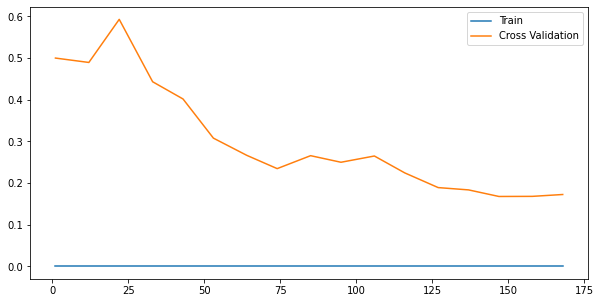

In [26]:
f, ax = plt.subplots(figsize=(10, 5))

ax.plot(train_sizes_abs, train_scores_mean, label='Train')
ax.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

ax.legend()

Since here the difference between train and cross validation is curve is large therefore we have **`High Variance`** issue. This issue can be solved by using `more data` and thus improving the model. But since we don't have more so this is our final model.

<hr>

## Creating the model

In [27]:
model = RandomForestClassifier(criterion='entropy')

#### Fitting the model

In [28]:
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(criterion='entropy')

#### Predicting

In [29]:
y_test_pred = model.predict(X_test)

#### Evaluating

In [30]:
# Metrics

print(model.score(X_test, y_test))
print(f1_score(y_test, y_test_pred, average="weighted"))
print(precision_score(y_test, y_test_pred, average="weighted"))
print(recall_score(y_test, y_test_pred, average="weighted"))

0.7
0.7000000000000001
0.7
0.7


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        45
         1.0       0.40      0.40      0.40        15

    accuracy                           0.70        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.70      0.70      0.70        60

Confusion matrix, without normalization
[[36  9]
 [ 9  6]]


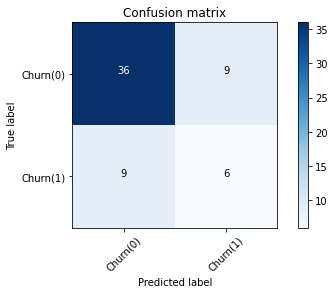

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, y_test_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Churn(0)','Churn(1)'],normalize= False,  title='Confusion matrix')

#### Saving the model

In [33]:
from joblib import dump

dump(model, 'model.joblib')

['model.joblib']

<hr>